<a href="https://colab.research.google.com/github/NoCodeProgram/deepLearning/blob/main/nn/dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/NoCodeProgram/deepLearning.git


Cloning into 'deepLearning'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 92 (delta 23), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (92/92), 3.18 MiB | 7.11 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
import torch
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('./deepLearning/nn/swirl.csv')
data = df[['x', 'y']].values
labels = df['label'].values.reshape(-1, 1)

# Print the shapes of the data and labels
print('Data shape:', data.shape)
print('Labels shape:', labels.shape)



Data shape: (280, 2)
Labels shape: (280, 1)


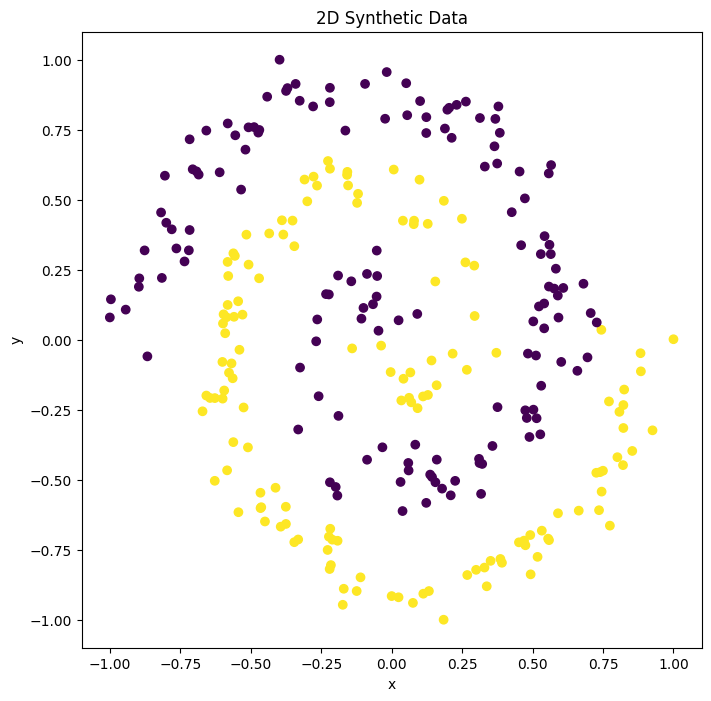

In [ ]:

import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis')
# plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis')

# Set the title and labels
plt.title('2D Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [ ]:
import torch

# Convert the numpy arrays to PyTorch tensors
data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.float32)
data_length = len(data_torch)
split_length = int(0.7*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape)

torch.Size([196, 2]) torch.Size([196, 1])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

input_size = 2
hidden_size = 16
output_size = 1

g = torch.Generator().manual_seed(42)
g.manual_seed(42)
torch.manual_seed(42)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


net = Net()

loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for steps in range(25000):
    net.train()

    output = net(train_data)
    train_loss = loss_fn(output, train_labels)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        net.eval()
        output = net(val_data)
        val_loss = loss_fn(output, val_labels)
        output = net(train_data)
        t_loss = loss_fn(output,train_labels)
        print(f"{steps} val_loss: {val_loss.item()}, train_loss: {t_loss.item()}")


0 val_loss: 0.6986218690872192, train_loss: 0.6956213116645813
1000 val_loss: 0.691857635974884, train_loss: 0.6905266046524048
2000 val_loss: 0.6866223216056824, train_loss: 0.6839669942855835
3000 val_loss: 0.6573339700698853, train_loss: 0.6506971120834351
4000 val_loss: 0.5904173851013184, train_loss: 0.583895206451416
5000 val_loss: 0.5605559349060059, train_loss: 0.5539382100105286
6000 val_loss: 0.5195993781089783, train_loss: 0.5029334425926208
7000 val_loss: 0.4366813898086548, train_loss: 0.37637102603912354
8000 val_loss: 0.4008447229862213, train_loss: 0.3169533312320709
9000 val_loss: 0.3742104172706604, train_loss: 0.28214749693870544
10000 val_loss: 0.35307610034942627, train_loss: 0.24136653542518616
11000 val_loss: 0.32098299264907837, train_loss: 0.19411112368106842
12000 val_loss: 0.28524249792099, train_loss: 0.13822485506534576
13000 val_loss: 0.26550546288490295, train_loss: 0.09474729746580124
14000 val_loss: 0.2866414487361908, train_loss: 0.08561829477548599
15

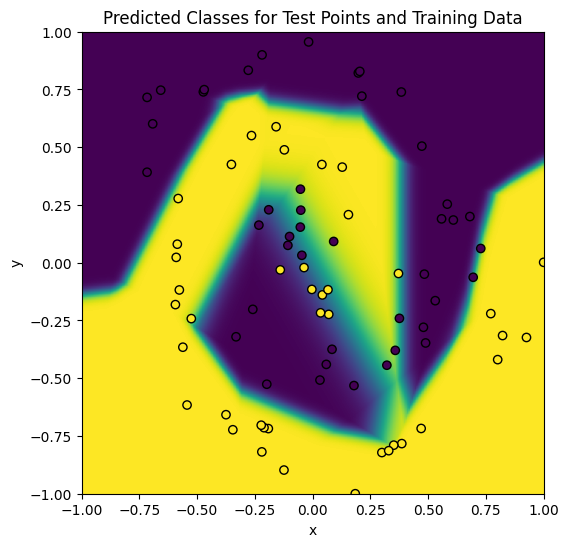

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points along each dimension (x and y)
n_points = 300

# Create a grid of uniformly spaced points over [-1, 1] in both x and y dimensions
x_points = np.linspace(-1, 1, n_points)
y_points = np.linspace(-1, 1, n_points)
x_grid, y_grid = np.meshgrid(x_points, y_points)
points_test = np.vstack((x_grid.flatten(), y_grid.flatten())).T

# Convert the points to a PyTorch tensor
points_test_torch = torch.from_numpy(points_test).float()

net.eval()
output_test = net(points_test_torch)

probabilities = torch.sigmoid(output_test)
probabilities_np = probabilities.detach().numpy()

plt.figure(figsize=(6, 6))

# Use imshow to display the gradation plot
plt.imshow(probabilities_np.reshape(n_points, n_points), extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
#plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap='viridis', edgecolors='k')
plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis', edgecolors='k')

# Set the title and labels
plt.title('Predicted Classes for Test Points and Training Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

input_size = 2
hidden_size = 16
output_size = 1

g.manual_seed(42)
torch.manual_seed(42)

class DNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


dnet = DNet()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(dnet.parameters(), lr=0.01)

for steps in range(25000):
    dnet.train()

    output = dnet(train_data)
    train_loss = loss_fn(output, train_labels)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        dnet.eval()
        output = dnet(val_data)
        val_loss = loss_fn(output, val_labels)
        output = dnet(train_data)
        t_loss = loss_fn(output,train_labels)
        print(f"{steps} val_loss: {val_loss.item()}, train_loss: {t_loss.item()}")


0 val_loss: 0.6986285448074341, train_loss: 0.6956262588500977
1000 val_loss: 0.6922621726989746, train_loss: 0.6912891864776611
2000 val_loss: 0.6899824142456055, train_loss: 0.6883436441421509
3000 val_loss: 0.6823662519454956, train_loss: 0.6791813969612122
4000 val_loss: 0.6571910381317139, train_loss: 0.6521286964416504
5000 val_loss: 0.6210031509399414, train_loss: 0.617628276348114
6000 val_loss: 0.6002033352851868, train_loss: 0.5989266633987427
7000 val_loss: 0.584645688533783, train_loss: 0.5823971033096313
8000 val_loss: 0.5614193677902222, train_loss: 0.5565236806869507
9000 val_loss: 0.5204776525497437, train_loss: 0.5109427571296692
10000 val_loss: 0.4815022051334381, train_loss: 0.45833227038383484
11000 val_loss: 0.4444494843482971, train_loss: 0.38860368728637695
12000 val_loss: 0.4105587899684906, train_loss: 0.34136977791786194
13000 val_loss: 0.38482725620269775, train_loss: 0.3111666440963745
14000 val_loss: 0.3638460636138916, train_loss: 0.28631123900413513
15000

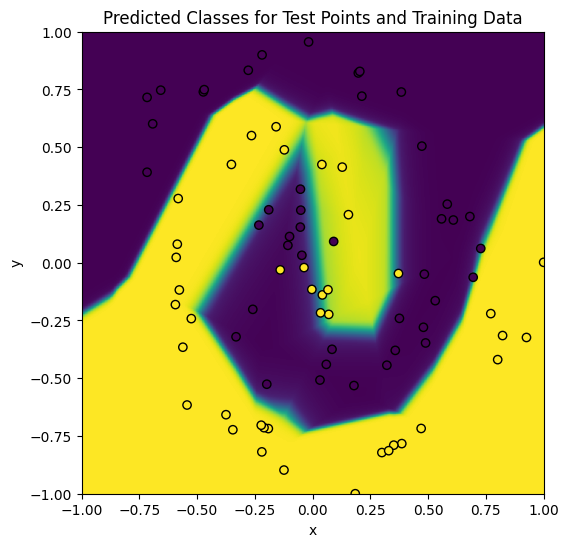

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points along each dimension (x and y)
n_points = 300

# Create a grid of uniformly spaced points over [-1, 1] in both x and y dimensions
x_points = np.linspace(-1, 1, n_points)
y_points = np.linspace(-1, 1, n_points)
x_grid, y_grid = np.meshgrid(x_points, y_points)
points_test = np.vstack((x_grid.flatten(), y_grid.flatten())).T

# Convert the points to a PyTorch tensor
points_test_torch = torch.from_numpy(points_test).float()
dnet.eval()
output_test = dnet(points_test_torch)

probabilities = torch.sigmoid(output_test)
probabilities_np = probabilities.detach().numpy()

plt.figure(figsize=(6, 6))

# Use imshow to display the gradation plot
plt.imshow(probabilities_np.reshape(n_points, n_points), extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
# plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap='viridis', edgecolors='k')
plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis', edgecolors='k')

# Set the title and labels
plt.title('Predicted Classes for Test Points and Training Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


In [ ]:
import torch
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('./deepLearning/nn/swirl_10k.csv')
data = df[['x', 'y']].values
labels = df['label'].values.reshape(-1, 1)

# Print the shapes of the data and labels
print('Data shape:', data.shape)
print('Labels shape:', labels.shape)



Data shape: (20000, 2)
Labels shape: (20000, 1)


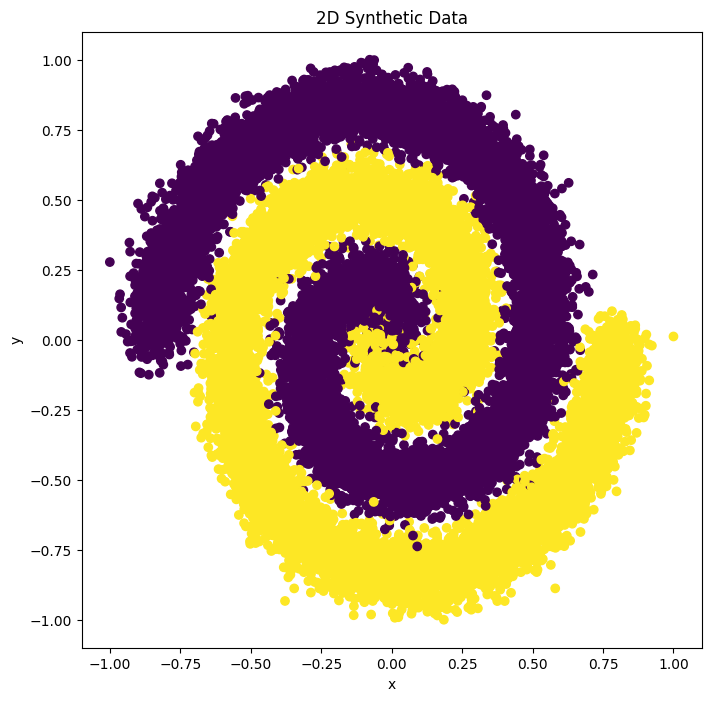

In [ ]:

import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis')
# plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis')

# Set the title and labels
plt.title('2D Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [ ]:
import torch

# Convert the numpy arrays to PyTorch tensors
data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.float32)
data_length = len(data_torch)
split_length = int(0.7*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape)

torch.Size([14000, 2]) torch.Size([14000, 1])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

input_size = 2
hidden_size = 16
output_size = 1

g.manual_seed(42)
torch.manual_seed(42)

class DNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


dnet = DNet()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(dnet.parameters(), lr=0.01)

for steps in range(200000):
    dnet.train()

    output = dnet(train_data)
    train_loss = loss_fn(output, train_labels)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        dnet.eval()
        output = dnet(val_data)
        val_loss = loss_fn(output, val_labels)
        output = dnet(train_data)
        t_loss = loss_fn(output,train_labels)
        print(f"{steps} val_loss: {val_loss.item()}, train_loss: {t_loss.item()}")


0 val_loss: 0.6951484084129333, train_loss: 0.6962178349494934
1000 val_loss: 0.6915515661239624, train_loss: 0.6913620829582214
2000 val_loss: 0.689126193523407, train_loss: 0.6888158321380615
3000 val_loss: 0.6826361417770386, train_loss: 0.6820117235183716
4000 val_loss: 0.6671326756477356, train_loss: 0.6656956672668457
5000 val_loss: 0.6485736966133118, train_loss: 0.6460394263267517
6000 val_loss: 0.6370365619659424, train_loss: 0.633649468421936
7000 val_loss: 0.6289672255516052, train_loss: 0.624914288520813
8000 val_loss: 0.6198385953903198, train_loss: 0.6151098608970642
9000 val_loss: 0.603272557258606, train_loss: 0.5976450443267822
10000 val_loss: 0.5771333575248718, train_loss: 0.5699177384376526
11000 val_loss: 0.5455065369606018, train_loss: 0.5364870429039001
12000 val_loss: 0.5230188965797424, train_loss: 0.5129849314689636
13000 val_loss: 0.5087750554084778, train_loss: 0.4981926679611206
14000 val_loss: 0.4989970624446869, train_loss: 0.4879744350910187
15000 val_lo

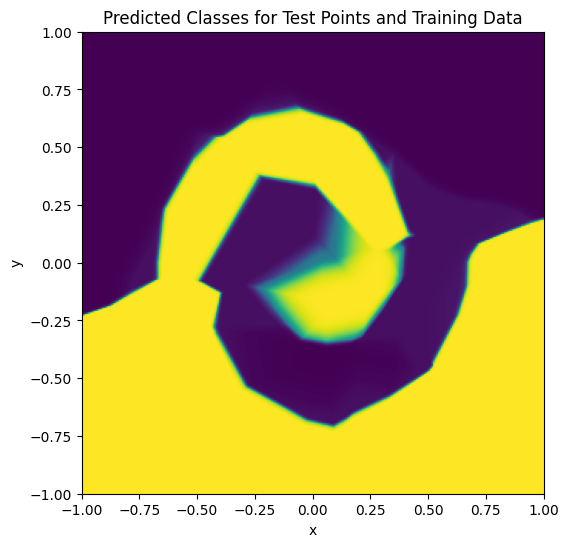

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points along each dimension (x and y)
n_points = 300

# Create a grid of uniformly spaced points over [-1, 1] in both x and y dimensions
x_points = np.linspace(-1, 1, n_points)
y_points = np.linspace(-1, 1, n_points)
x_grid, y_grid = np.meshgrid(x_points, y_points)
points_test = np.vstack((x_grid.flatten(), y_grid.flatten())).T

# Convert the points to a PyTorch tensor
points_test_torch = torch.from_numpy(points_test).float()

dnet.eval()
output_test = dnet(points_test_torch)

probabilities = torch.sigmoid(output_test)
probabilities_np = probabilities.detach().numpy()
# probabilities_np = (probabilities_np > 0.5)
plt.figure(figsize=(6, 6))

# Use imshow to display the gradation plot
plt.imshow(probabilities_np.reshape(n_points, n_points), extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
#plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap='viridis', edgecolors='k')
# plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis', edgecolors='k')

# Set the title and labels
plt.title('Predicted Classes for Test Points and Training Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()
